In [6]:
# go to the root directory
%cd /home/studio-lab-user/701-simplicity-bias
import os

assert os.path.exists('./trainers/trainer.py')

/home/studio-lab-user/701-simplicity-bias


In [51]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from models import generate_fcn
from trainers import Trainer
from synthetic_data.linear_slabs import load_arrays, visualize_lms_array
import datetime
from logging import Logger, StreamHandler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
# follow the config of original paper

model_config = dict(
    num_layers=2,
    input_dim=50,
    output_dim=2,
    latent_dim=100,
    use_bn=False,
    dropout_probability=0.0,
    linear_init=None
)

In [53]:
model = generate_fcn(**model_config)
model

Sequential(
  (0): Linear(in_features=50, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=2, bias=True)
)

In [59]:
# use lms_7_noisy
train_data, w = load_arrays('./data/lms_7_40000_noisy_train.npz')
val_data, _ = load_arrays('./data/lms_7_40000_noisy_val.npz')

In [60]:
trainer_logger = Logger('trainer')
trainer_logger.setLevel('DEBUG')
trainer_logger.addHandler(StreamHandler())
trainer_config = dict(
    train_data=dict(
        dataset=train_data,
        batch_size=256,
        shuffle=True
    ), val_data=dict(
        dataset=val_data,
        batch_size=256,
        shuffle=False
    ),
    model=generate_fcn(**model_config),
    loss=torch.nn.CrossEntropyLoss(),
    device='cuda' if torch.cuda.is_available() else 'cpu',
    evaluate_interval=500,
    save_interval=0,
    work_dir='./training_logs/lms7_noisy_{}/'.format(datetime.datetime.now().strftime('%m%d%H%M')),
    loss_eps=1e-2,
    logger=trainer_logger,
    max_steps=100000,
    optimizer=dict(
        cls='SGD',
        lr=0.1,
        weight_decay=5.0e-5
    )
)
trainer = Trainer(**trainer_config)

model: Sequential(
  (0): Linear(in_features=50, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=2, bias=True)
)


In [61]:
trainer.run()

Step 0: Loss 0.6939399242401123
Evaluating ...


Started, logging to ./training_logs/lms7_noisy_09300918/...


Step: 0
Train/AverageLoss: 0.6944024211883545
Train/Accuracy: 0.5023
Val/AverageLoss: 0.6948339616775513
Val/Accuracy: 0.4998
Step 500: Loss 0.08635426312685013
Evaluating ...
Step: 500
Train/AverageLoss: 0.08966424740552902
Train/Accuracy: 0.95305
Val/AverageLoss: 0.0977458401978016
Val/Accuracy: 0.9486
Step 1000: Loss 0.08612614870071411
Evaluating ...
Step: 1000
Train/AverageLoss: 0.0865793025135994
Train/Accuracy: 0.9547
Val/AverageLoss: 0.09736523213088512
Val/Accuracy: 0.949
Step 1500: Loss 0.0959659144282341
Evaluating ...
Step: 1500
Train/AverageLoss: 0.08406862732768058
Train/Accuracy: 0.956125
Val/AverageLoss: 0.09865675393044948
Val/Accuracy: 0.9486
Step 2000: Loss 0.08484294265508652
Evaluating ...
Step: 2000
Train/AverageLoss: 0.08222039742469787
Train/Accuracy: 0.95545
Val/AverageLoss: 0.09809539896845818
Val/Accuracy: 0.9485
Step 2500: Loss 0.07590064406394958
Evaluating ...
Step: 2500
Train/AverageLoss: 0.07982836520671845
Train/Accuracy: 0.957075
Val/AverageLoss: 0.098

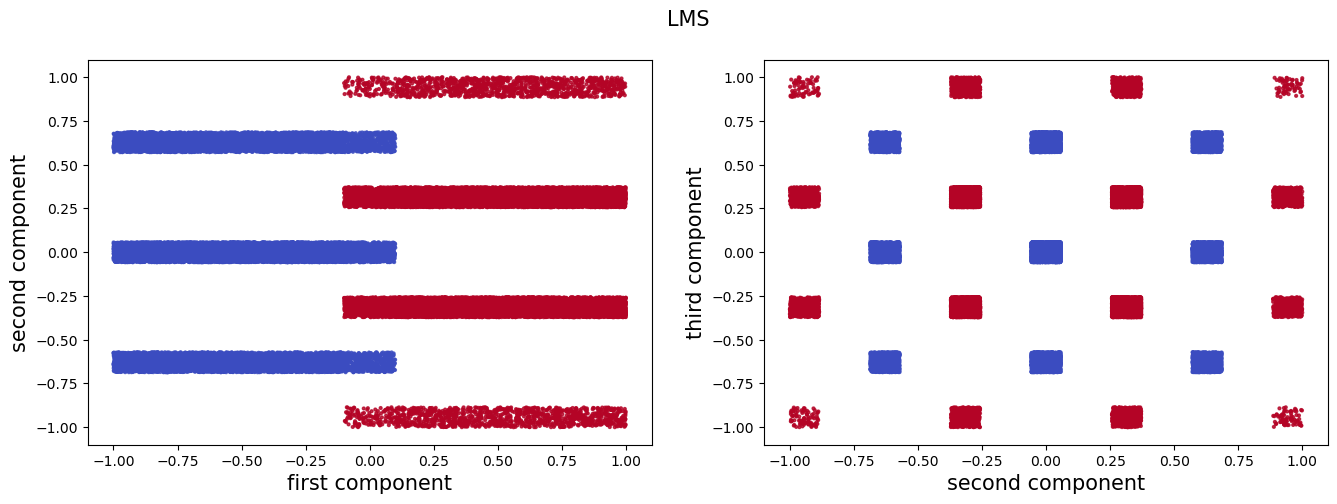

In [57]:
x, y = train_data.tensors
x = x.cpu().numpy()
y = y.cpu().numpy()
visualize_lms_array(x, y, w)

In [58]:
(y == 0).sum(), (y==1).sum()

(20057, 19943)

In [44]:
ref_train_data, w = load_arrays('./data/noisy_lms_ref_train.npz')
ref_val_data, _ = load_arrays('./data/noisy_lms_ref_val.npz')
ref_trainer_logger = Logger('ref_trainer')
ref_trainer_logger.setLevel('DEBUG')
ref_trainer_logger.addHandler(StreamHandler())
ref_trainer_config = dict(
    train_data=dict(
        dataset=ref_train_data,
        batch_size=256,
        shuffle=True
    ), val_data=dict(
        dataset=ref_val_data,
        batch_size=256,
        shuffle=False
    ),
    model=generate_fcn(**model_config),
    loss=torch.nn.CrossEntropyLoss(),
    device='cuda' if torch.cuda.is_available() else 'cpu',
    evaluate_interval=500,
    save_interval=0,
    work_dir='./training_logs/ref_lms7_noisy_{}/'.format(datetime.datetime.now().strftime('%m%d%H%M')),
    loss_eps=0.005,
    logger=ref_trainer_logger,
    max_steps=100000,
    optimizer=dict(
        cls='SGD',
        lr=0.1,
        weight_decay=5.0e-5
    )
)
ref_trainer = Trainer(**ref_trainer_config)

model: Sequential(
  (0): Linear(in_features=50, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=2, bias=True)
)


In [45]:
ref_trainer.run()

Step 0: Loss 0.6934109330177307
Evaluating ...


Started, logging to ./training_logs/ref_lms7_noisy_09300458/...


Step: 0
Train/AverageLoss: 0.6924677877426147
Train/Accuracy: 0.509425
Val/AverageLoss: 0.6928386326789856
Val/Accuracy: 0.509
Step 500: Loss 0.10599302500486374
Evaluating ...
Step: 500
Train/AverageLoss: 0.09196858252286912
Train/Accuracy: 0.952825
Val/AverageLoss: 0.09932989836931229
Val/Accuracy: 0.9481
Step 1000: Loss 0.097358837723732
Evaluating ...
Step: 1000
Train/AverageLoss: 0.08837874215841293
Train/Accuracy: 0.95395
Val/AverageLoss: 0.09786650669574738
Val/Accuracy: 0.9481
Step 1500: Loss 0.0797085389494896
Evaluating ...
Step: 1500
Train/AverageLoss: 0.08540886853337287
Train/Accuracy: 0.9554
Val/AverageLoss: 0.09802004001140595
Val/Accuracy: 0.9476
Step 2000: Loss 0.08025125414133072
Evaluating ...
Step: 2000
Train/AverageLoss: 0.08358294162154198
Train/Accuracy: 0.956175
Val/AverageLoss: 0.09810291222333908
Val/Accuracy: 0.9475
Step 2500: Loss 0.09204369783401489
Evaluating ...
Step: 2500
Train/AverageLoss: 0.08144367113113403
Train/Accuracy: 0.95725
Val/AverageLoss: 0.0